# Scenario comparison

In [6]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [7]:
df = pd.read_excel('scenario_comparison_table.xlsx', sheet_name = 'Overview', header = 1, usecols = "B:E, L:O", engine = 'openpyxl')
df.rename(columns = {'Primary materials.1': 'Primary materials', 'Secondary materials.1': 'Secondary materials', 'Reused batteries.1': 'Reused batteries', 'New batteries.1': 'New batteries'}, inplace = True)

In [8]:
df

,EV Scenario,Reuse Scenario,V2G Scenario,Storage Demand Scenario,Primary materials,Secondary materials,Reused batteries,New batteries
0,STEP,No reuse,No V2G,Low,38466.838381,7762.230904,0.000000,503.501562
1,STEP,No reuse,No V2G,Medium,39016.024474,7819.026427,0.000000,845.695049
2,STEP,No reuse,No V2G,High,39569.188193,7877.095303,0.000000,1190.853726
3,STEP,No reuse,No V2G,CP4All,40245.388169,7890.463506,0.000000,1580.247948
4,STEP,No reuse,Low,Low,37730.997091,7690.104978,0.000000,47.248251
...,...,...,...,...,...,...,...,...
139,SD,All reused,V2G mandate,CP4All,52452.339248,1070.263774,0.359732,0.000000
140,SD,All reused,Early,Low,52436.580390,1082.941128,0.068615,0.000000
141,SD,All reused,Early,Medium,52442.016083,1078.568336,0.169030,0.000000
142,SD,All reused,Early,High,52448.893998,1073.035336,0.296087,0.000000


In [9]:
df_ascend_prim = df.sort_values(by = ['Primary materials'], ascending = False)
df_ascend_prim.reset_index(inplace = True)

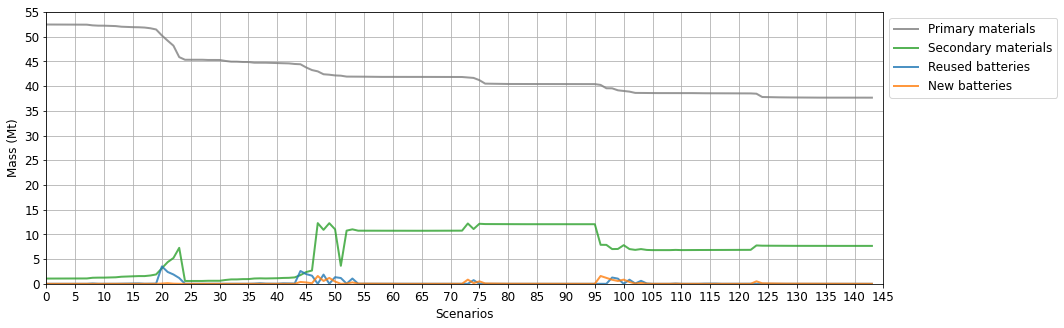

In [10]:
fig = plt.figure(figsize=[15, 5], facecolor ='white')
transp = 0.8     
plt.plot(df_ascend_prim['Primary materials']/1000, label = 'Primary materials', alpha = transp, linewidth = 2, color = 'tab:grey')
plt.plot(df_ascend_prim['Secondary materials']/1000, label = 'Secondary materials', alpha = transp, linewidth = 2, color = 'tab:green')
plt.plot(df_ascend_prim['Reused batteries']/1000, label = 'Reused batteries', alpha = transp, linewidth = 2, color = 'tab:blue')
plt.plot(df_ascend_prim['New batteries']/1000, label = 'New batteries', alpha = transp, linewidth = 2, color = 'tab:orange')
plt.grid()
plt.xticks(np.arange(0, 150, 5))
plt.xlim((0, 145))
plt.yticks(np.arange(0, 60, 5))
plt.ylim((0,55))
plt.xlabel('Scenarios')
plt.ylabel('Mass (Mt)')
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))

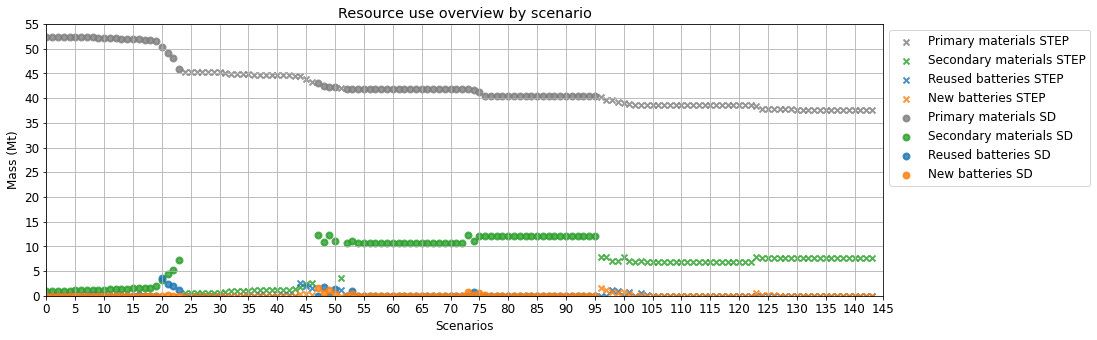

In [14]:
fig = plt.figure(figsize=[15, 5], facecolor ='white')
transp = 0.8     
for ev_scenario in ['STEP', 'SD']:
    if ev_scenario == 'STEP':
        pmarker = 'x'
    if ev_scenario == 'SD':
        pmarker = 'o'
    for col in ['Primary materials', 'Secondary materials', 'Reused batteries', 'New batteries']:
        if col == 'Primary materials':
            pcolor = 'tab:grey'
        if col == 'Secondary materials':
            pcolor = 'tab:green'
        if col == 'Reused batteries':
            pcolor = 'tab:blue'
        if col == 'New batteries':
            pcolor = 'tab:orange'
        # plot
        plt.scatter(df_ascend_prim.loc[df_ascend_prim['EV Scenario'] == ev_scenario, col].index,\
                    df_ascend_prim.loc[df_ascend_prim['EV Scenario'] == ev_scenario, col].values/1000,\
                    marker = pmarker, label = col+' '+ev_scenario, alpha = transp, linewidth = 2, c = pcolor)
# beautification
plt.grid()
plt.xticks(np.arange(0, 150, 5))
plt.xlim((0, 145))
plt.yticks(np.arange(0, 60, 5))
plt.ylim((0,55))
plt.xlabel('Scenarios')
plt.ylabel('Mass (Mt)')
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.title('Resource use overview by scenario')
plt.savefig('mass_by_scenario.png', dpi = 300, bbox_inches = 'tight')